<a href="https://colab.research.google.com/github/hvyrain/bigprobasic/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D03_%EC%9D%B8%EA%B5%AC%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 사용하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 7. 우리동네 인구 구조 시각화하기

### 01. 인구 공공데이터 내려받기, p96
- http://www.mois.go.kr - 정책자료 - 통계 - 주민등록 인구 통계 
- 연령별 인구 현황 - 통계표 - 단위 1세, 만 연령구분 0 - 검색 - CSV 다운로드
- 파일명 : age.csv

### 02. 인구 데이터 살펴보고 질문하기, p100
- 1열 : 행정구역 이름, 10자리 행정구역 코드 (서울특별시 종로구 사직동(1111053000)
- 2~3열 : 해당 지역의 전체 인구 (총 인구수, 연령구간 인구수)
- 4열 ~ : 만 0세부터의 연령별 인구 

### 03. 우리동네 인구구조 시각화 하기, p101
- 신도림동의 나이 x 인구수 선그래프
1. 인구 데이터 파일 읽기
1. 한 줄씩 반복해서 읽어와서 우리 동네인지 확인
1. 우리 동네일 경우 0~100세 인구수를 순서대로 저장
1. 저장된 인구수 데이터를 시각화

In [ ]:
# p105, 나이를 함께 출력하도록 수정함.
import csv
f = open('age.csv', encoding='cp949')

data =  csv.reader(f)

for row in data :
  if '신도림' in row[0] :
    count = 0
    for i in row[3:] :
      print(f'{count} 세 : {int(i):,}명')
      count += 1

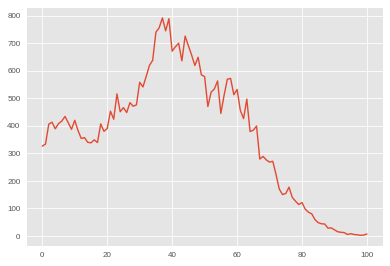

In [ ]:
# p106 ~ 107, 리스트에 저장한 후 그래프로 출력
import csv
f = open('age.csv', encoding='cp949')

data =  csv.reader(f)
result = []

for row in data :
  if '신도림' in row[0] :
    for i in row[3:] :
      result.append(int(i))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
# 사용가능 스타일 가져오기 
# plt.style.available
plt.plot(result)
plt.show()

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

비교하고 싶은 동을 입력하세요 : 용산2가


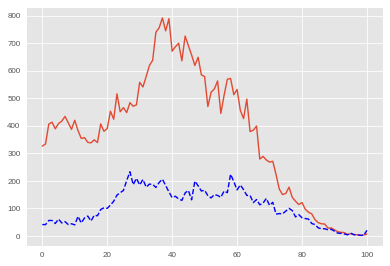

In [ ]:
# p106 응용, 다른 동과 비교하기
import csv
f = open('age.csv', encoding='cp949')

data =  csv.reader(f)
result = []
result2 = []
dong_name = input('비교하고 싶은 동을 입력하세요 : ')

# 입력 받은 동이름으로 2개 이상의 동이 존재하면 리스트 크기가 커진다.
for row in data :
  if '신도림' in row[0] :
    for i in row[3:] :
      result.append(int(i))
  if dong_name in row[0] :
    for i in row[3:] :
      result2.append(int(i))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
# 사용가능 스타일 가져오기 
# plt.style.available
plt.plot(result, label='신림동')
plt.plot(result2, 'b--', label=dong_name)
plt.show()

## 08. 인구 구조를 다양한 형태로 시각화하기, p109
- 막대그래프, 남녀별 항아리 그래프(gender.csv)

지역의 읍면동 단위 이름을 입력해 주세요 : 11170520
서울특별시 용산구 용산2가동(1117052000)


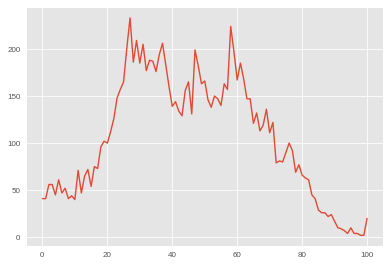

In [ ]:
# p109, 동 이름을 입력받아 그리기
# p106 ~ 107, 리스트에 저장한 후 그래프로 출력
import csv
f = open('age.csv', encoding='cp949')
data = csv.reader(f)

result = []
dong_name = input('지역의 읍면동 단위 이름을 입력해 주세요 : ')

for row in data :
  if dong_name in row[0] :
    print(row[0])
    for i in row[3:] :
      result.append(int(i.replace(',', '')))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
# 사용가능 스타일 가져오기 
# plt.style.available
plt.plot(result)
plt.show()

f.close()

### 01. 막대그리프 그리기, p111

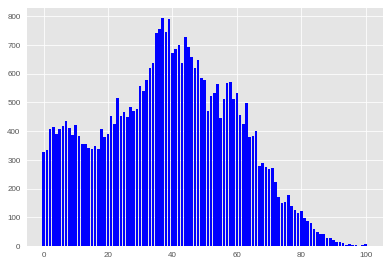

In [ ]:
# p113
import csv
f = open('age.csv', encoding='cp949')

data =  csv.reader(f)
result = []

for row in data :
  if '신도림' in row[0] :
    for i in row[3:] :
      result.append(int(i))

import matplotlib.pyplot as plt
plt.bar(range(len(result)), result, color='blue')
plt.show()

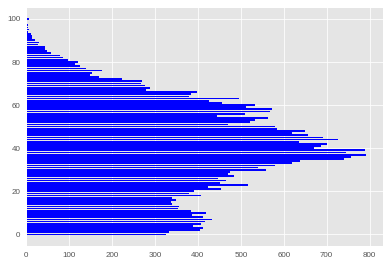

In [ ]:
# 위의 셀을 실행한 후 실행할 것!
plt.barh(range(len(result)), result, color='blue')
plt.show()

### 02. 항아리 모양 그래프 그리기, p114
- 데이터 내려받기 : www.mois.go.kr - 정책자료 - 통계 - 주민등록 인구통계 - 연령별 인구현황 - 통계표 탭
- 구분에서 계 선택 해제, 남녀 구분 선택 후 검색, 다운로드
- gender.csv 파일로 저장
- 남성 연령별 인구수 : 앞에서 4번째 부터 (인덱스 3~)
- 여성 연령별 인구수 : 뒤에서 -1번째 부터 (인덱스 106~), 역순 정렬

읍면동 명을 입력하세요 : 신도림


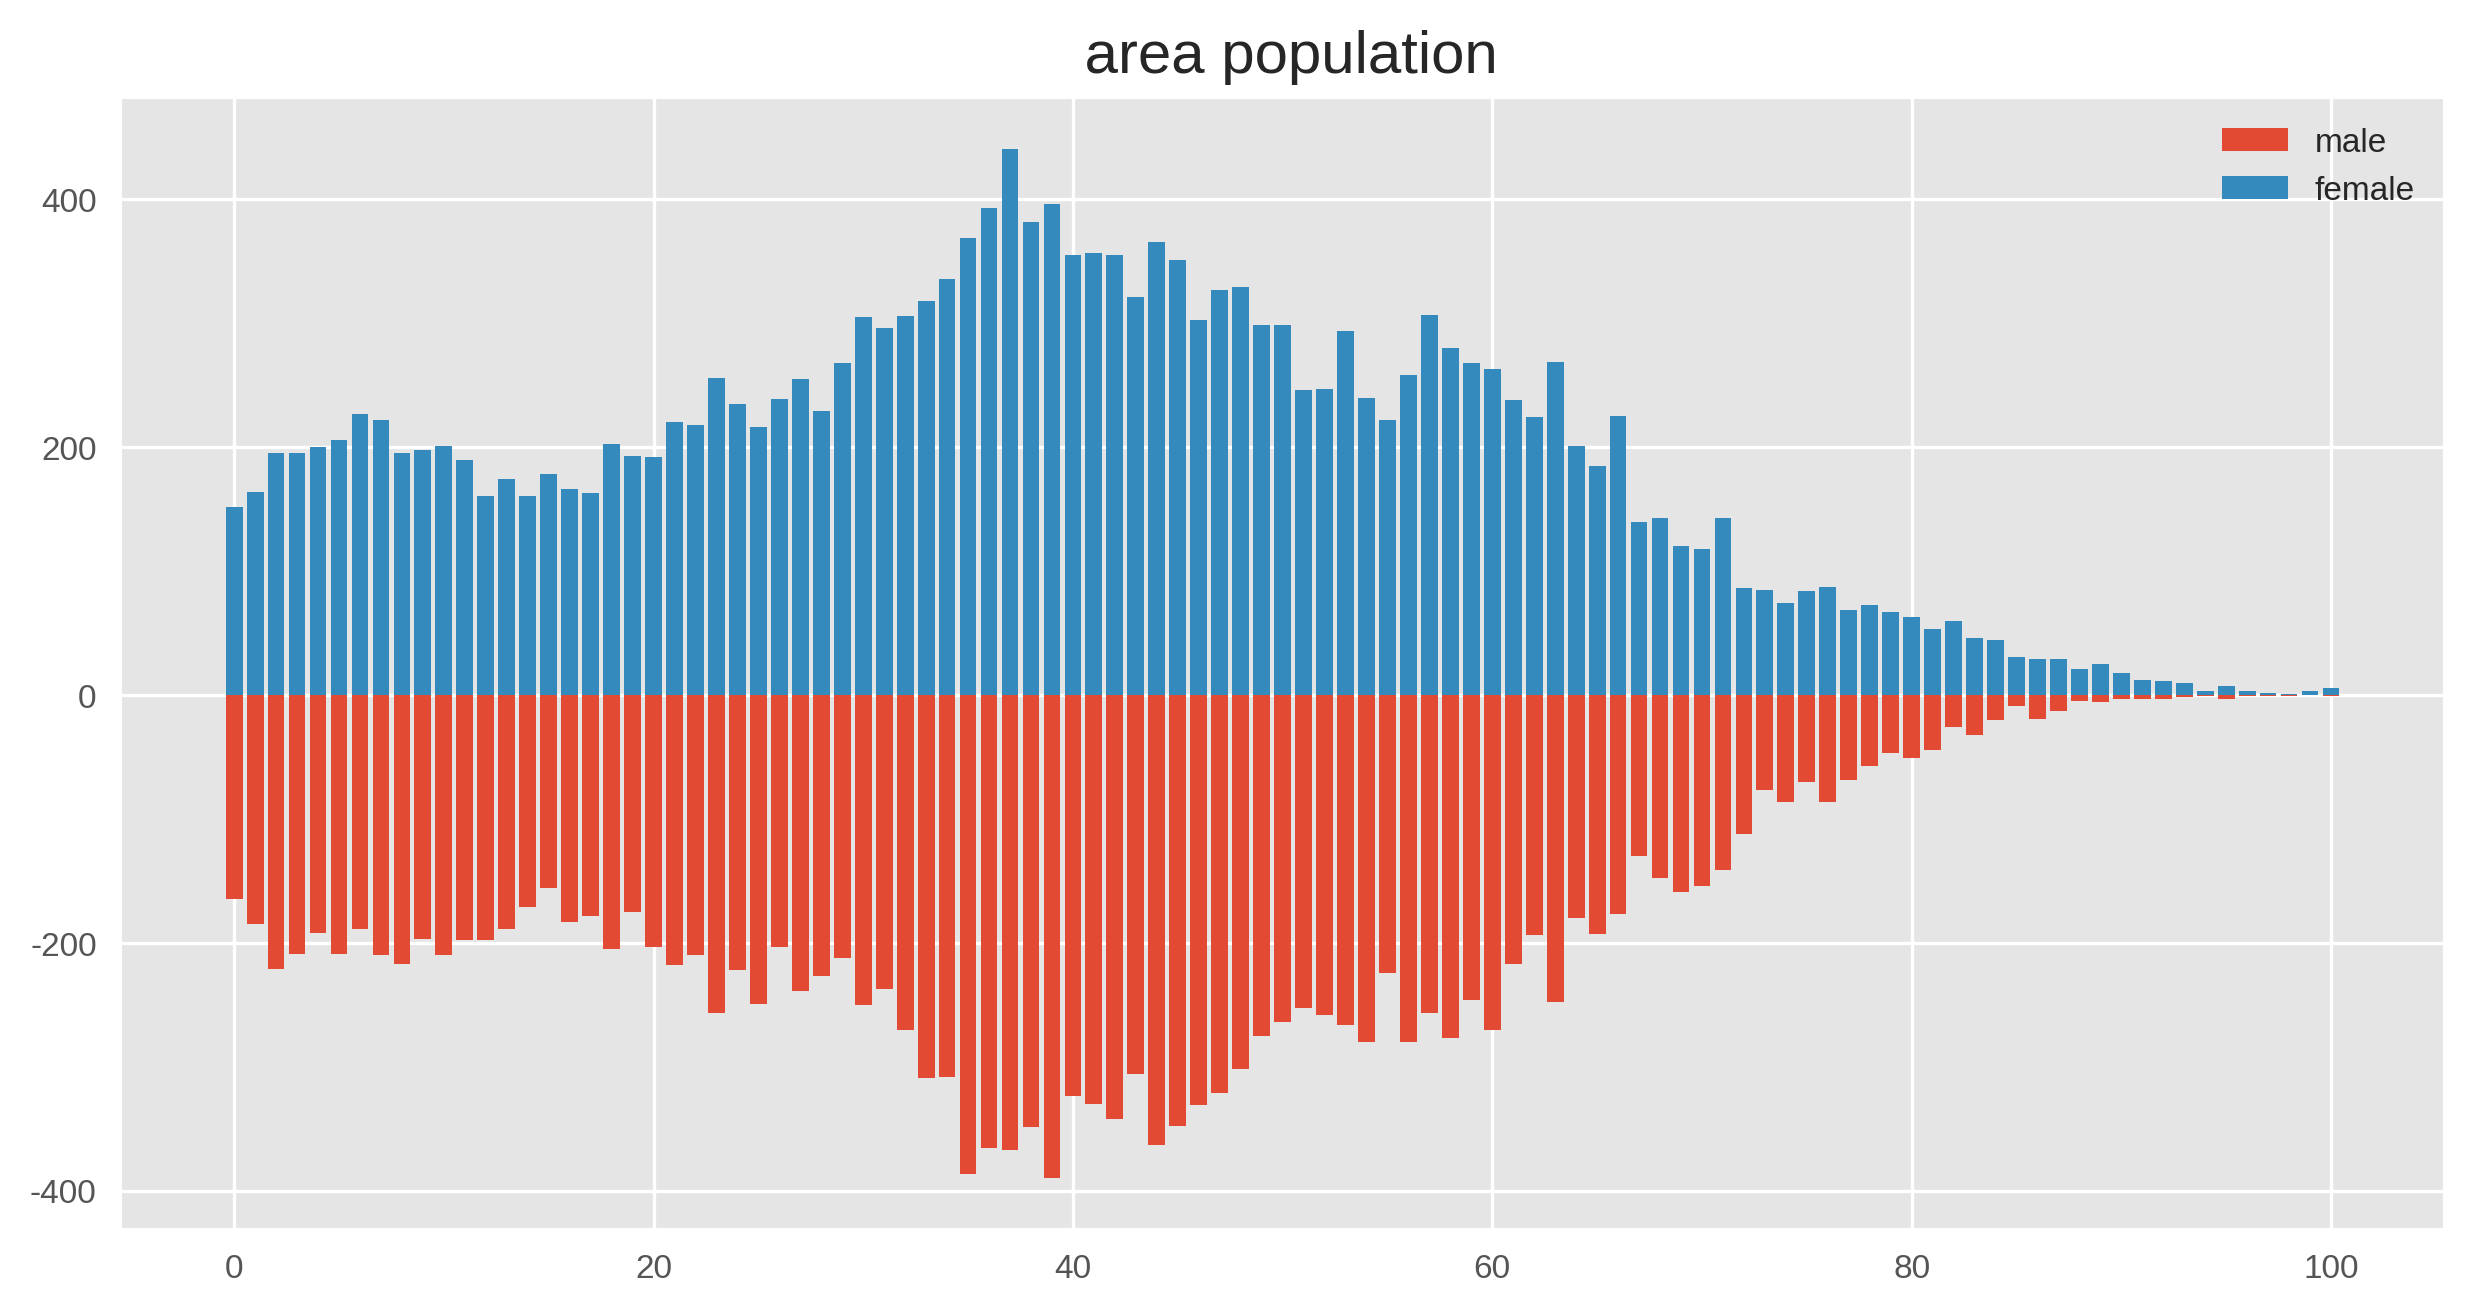

In [ ]:
# p121
import csv
f = open('gender.csv', encoding='cp949')
data = csv.reader(f)

m = []
f = []
dong_name = input('읍면동 명을 입력하세요 : ')

for row in data :
  if dong_name in row[0] :
    for i in row[3:104] :
      m.append(-int(i))
    for i in row[106:] :
      f.append(int(i))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
#plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(' area population')
plt.barh(range(len(m)), m, label='male')
plt.barh(range(len(f)), f, label='female')
plt.legend()
plt.show()

읍면동 명을 입력하세요 : 신도림


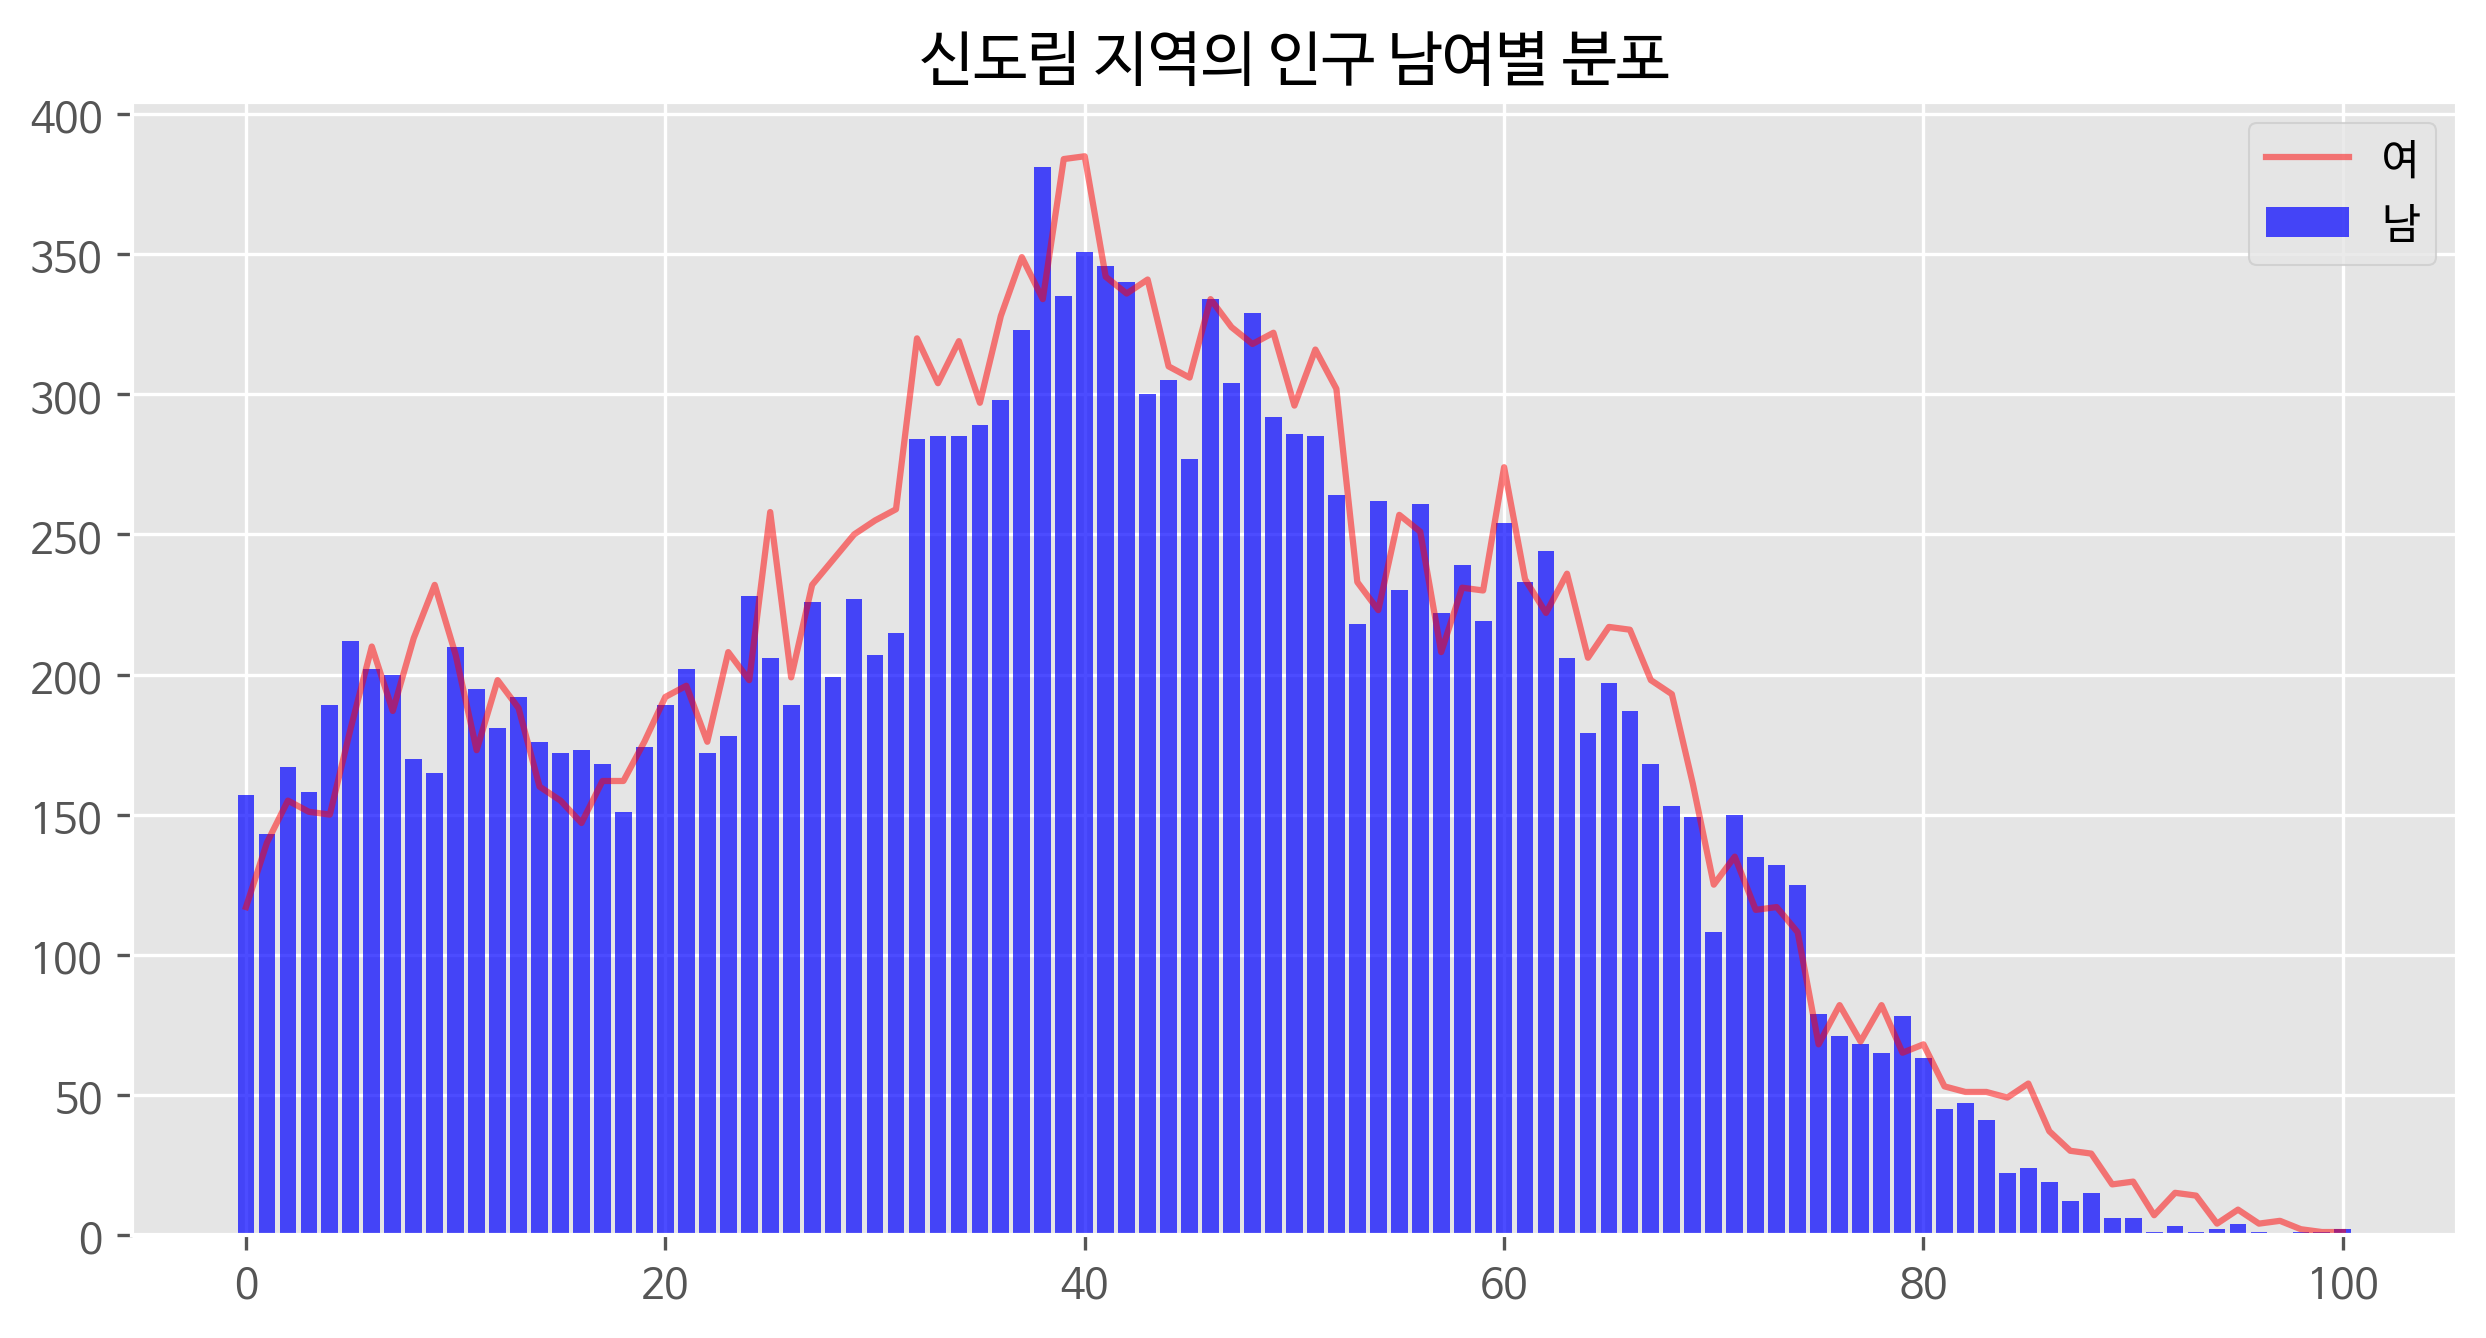

In [ ]:
# p121, 다르게 표현해 보기
import csv
f = open('gender-utf8.csv', encoding='utf-8')
data = csv.reader(f)

m = []
f = []
dong_name = input('읍면동 명을 입력하세요 : ')

for row in data :
  if dong_name in row[0] :
    for i in row[3:104] :
      m.append(int(i))
    for i in row[106:] :
      f.append(int(i))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
#plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(f'{dong_name} 지역의 인구 남여별 분포')
plt.bar(range(len(m)), m, label='남', alpha=.7, color='blue')
plt.plot(range(len(f)), f, label='여', alpha=.5, color='red')
plt.legend()
plt.show()

## 09. 우리 동네 인구 구조를 파이 차트로 나타내기, p124

### 01. 제주도에는 여성의 비율이 더 높을까, p125
- 제주특별자치도 읍면동이 4600여 개임
- 따라서 반복문에서 처음 찾은 제주특별자치도 실행 후 break로 빠져 나옴.

### 02. 혈액형 비율 표현하기
- 비율을 나타내기 위해 파이 그래프(pie()) 사용

※ 잡코리아 조사 결과
- A 형 : CEN, 경영, 사무 관련 직무
- B 형 : 생산, 현장 관련 직무
- O 형 : 영업, 관리 관련 직무
- AB형 : 마케팅, 광고 홍보 관련 직무

※ matplotlib에서 사용하는 다양한 색의 이름 : https://matplotlib.org/stable/gallery/color/named_colors.html

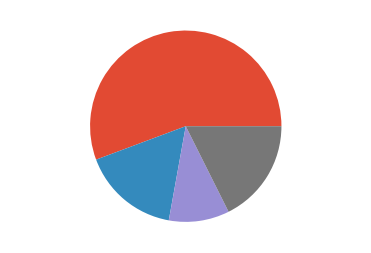

In [ ]:
# p131, 동그란 원 파이 그리기
import matplotlib.pyplot as plt
import random
size = [random.randrange(100) for i in range(4)]
plt.axis('equal')
plt.pie(size)
plt.show()

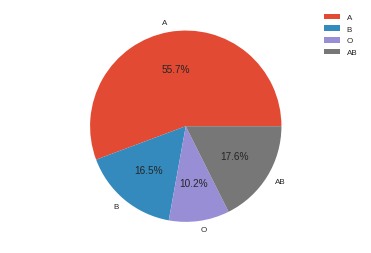

In [ ]:
# p132, 레이블 및 비율, 범례 추가하기
# 레이블 추가하기
label = ['A', 'B', 'O', 'AB']
plt.axis('equal')
# 비율 표시 : autopct
plt.pie(size, labels=label, autopct='%.1f%%')
# 범례 추가하기
plt.legend()
plt.show()

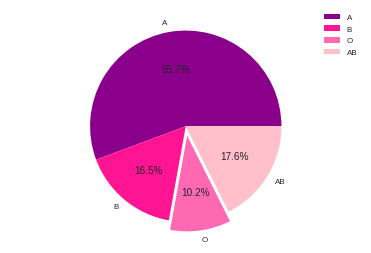

In [ ]:
# p134, 색 및 돌출 추가하기
# 레이블 추가하기
label = ['A', 'B', 'O', 'AB']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
# 비율 표시 : autopct
plt.pie(size, labels=label, autopct='%.1f%%', colors=color, explode=(0,0,0.1,0))
# 범례 추가하기
plt.legend()
plt.show()

In [ ]:
print(size)
sum(size)

[98, 29, 18, 31]


176

### 03. 제주도의 성별 인구 비율 표현하기, p136
- 남성인구의 합과 여성 인구의 합을 구하여 리스트에 추가한다.
- 다른 방법 : 나이별, 성별로 구한 리스트를 sum() 함수로 합계를 구한다.

In [ ]:
# 데이터 구조 보기
import csv

f = open('gender-utf8.csv')
data = csv.reader(f)
x = next(data)
count = 0
for i in x :
  print(f'{count} : {i}')
  count += 1

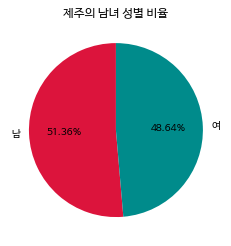

In [ ]:
size = []
m = f = 0
for row in data :
  if '제주특별자치도' in row[0] :
    for i in range(101) :
      m += int(row[i+3].replace(',',''))
      f += int(row[i+106].replace(',',''))
    break
size.append(m)
size.append(f)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.pie(size, labels=['남','여'], autopct='%.2f%%', colors=['crimson','darkcyan'], startangle=90)
plt.title('제주의 남녀 성별 비율')
plt.show()

## 10. 우리 동네 인구 구조를 산점도로 나타내기

### 01. 꺽은선 그래프로 표현하기, p141
- m, f 변수에 알고자 하는 동네의 남성(3~103), 여성(106~105) 까지의 값을 정수로 변환하여 저장한다.
- plt.plot() 함수를 사용하여 꺽은선 그래프로 그린다.

읍면동명 입력 : 기흥구


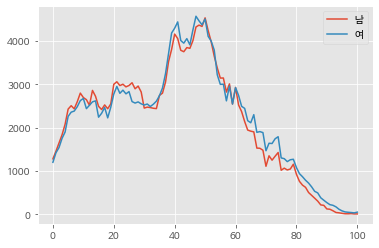

In [ ]:
import csv
f = open('gender-utf8.csv')
data = csv.reader(f)
m = []
f = []
name = input('읍면동명 입력 : ')
for row in data :
  if name in row[0] :
    for i in range(3, 104) :
      m.append(int(row[i].replace(',','')))
      f.append(int(row[i+103].replace(',','')))
    break

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.plot(m, label='남')
plt.plot(f, label='여')
plt.legend()
plt.show()

### 02. 막대그래프로 표현하기, p143
- 앞의 데이터에서 남성 인구 - 여성 인구 값을 리스트에 추가한다.
- plt.bar() 함수를 사용하여 막대그래프로 그린다.

읍면동명 입력 : 기흥구


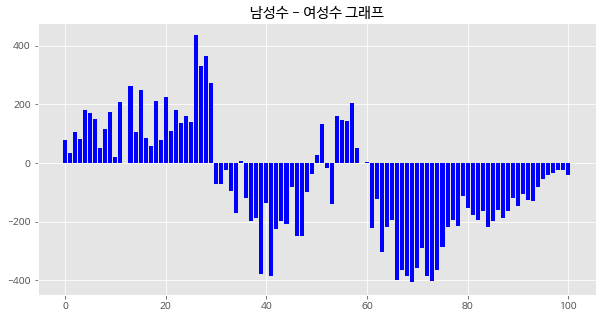

In [ ]:
import csv
f = open('gender-utf8.csv')
data = csv.reader(f)
result = []
name = input('읍면동명 입력 : ')
for row in data :
  if name in row[0] :
    for i in range(3, 104) :
      result.append(int(row[i].replace(',','')) - int(row[i+103].replace(',','')))
    break

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(10,5))
plt.bar(range(101), result, color='blue')
plt.title('남성수 - 여성수 그래프')
plt.show()

### 03. 산점도로 표현하기, p144
- 가로축을 남성, 세로축을 여성으로 하여 scatter() 함수로 산점도로 표시한다.
- plt.scatter(m, f, s=[점의 크기], c=range(101), alpha=.5, cmap='jet')
- plt.colorbar()
- plt.plot(range(max(m)), range(max(m)), 'g')

읍면동명 입력 : 기흥구


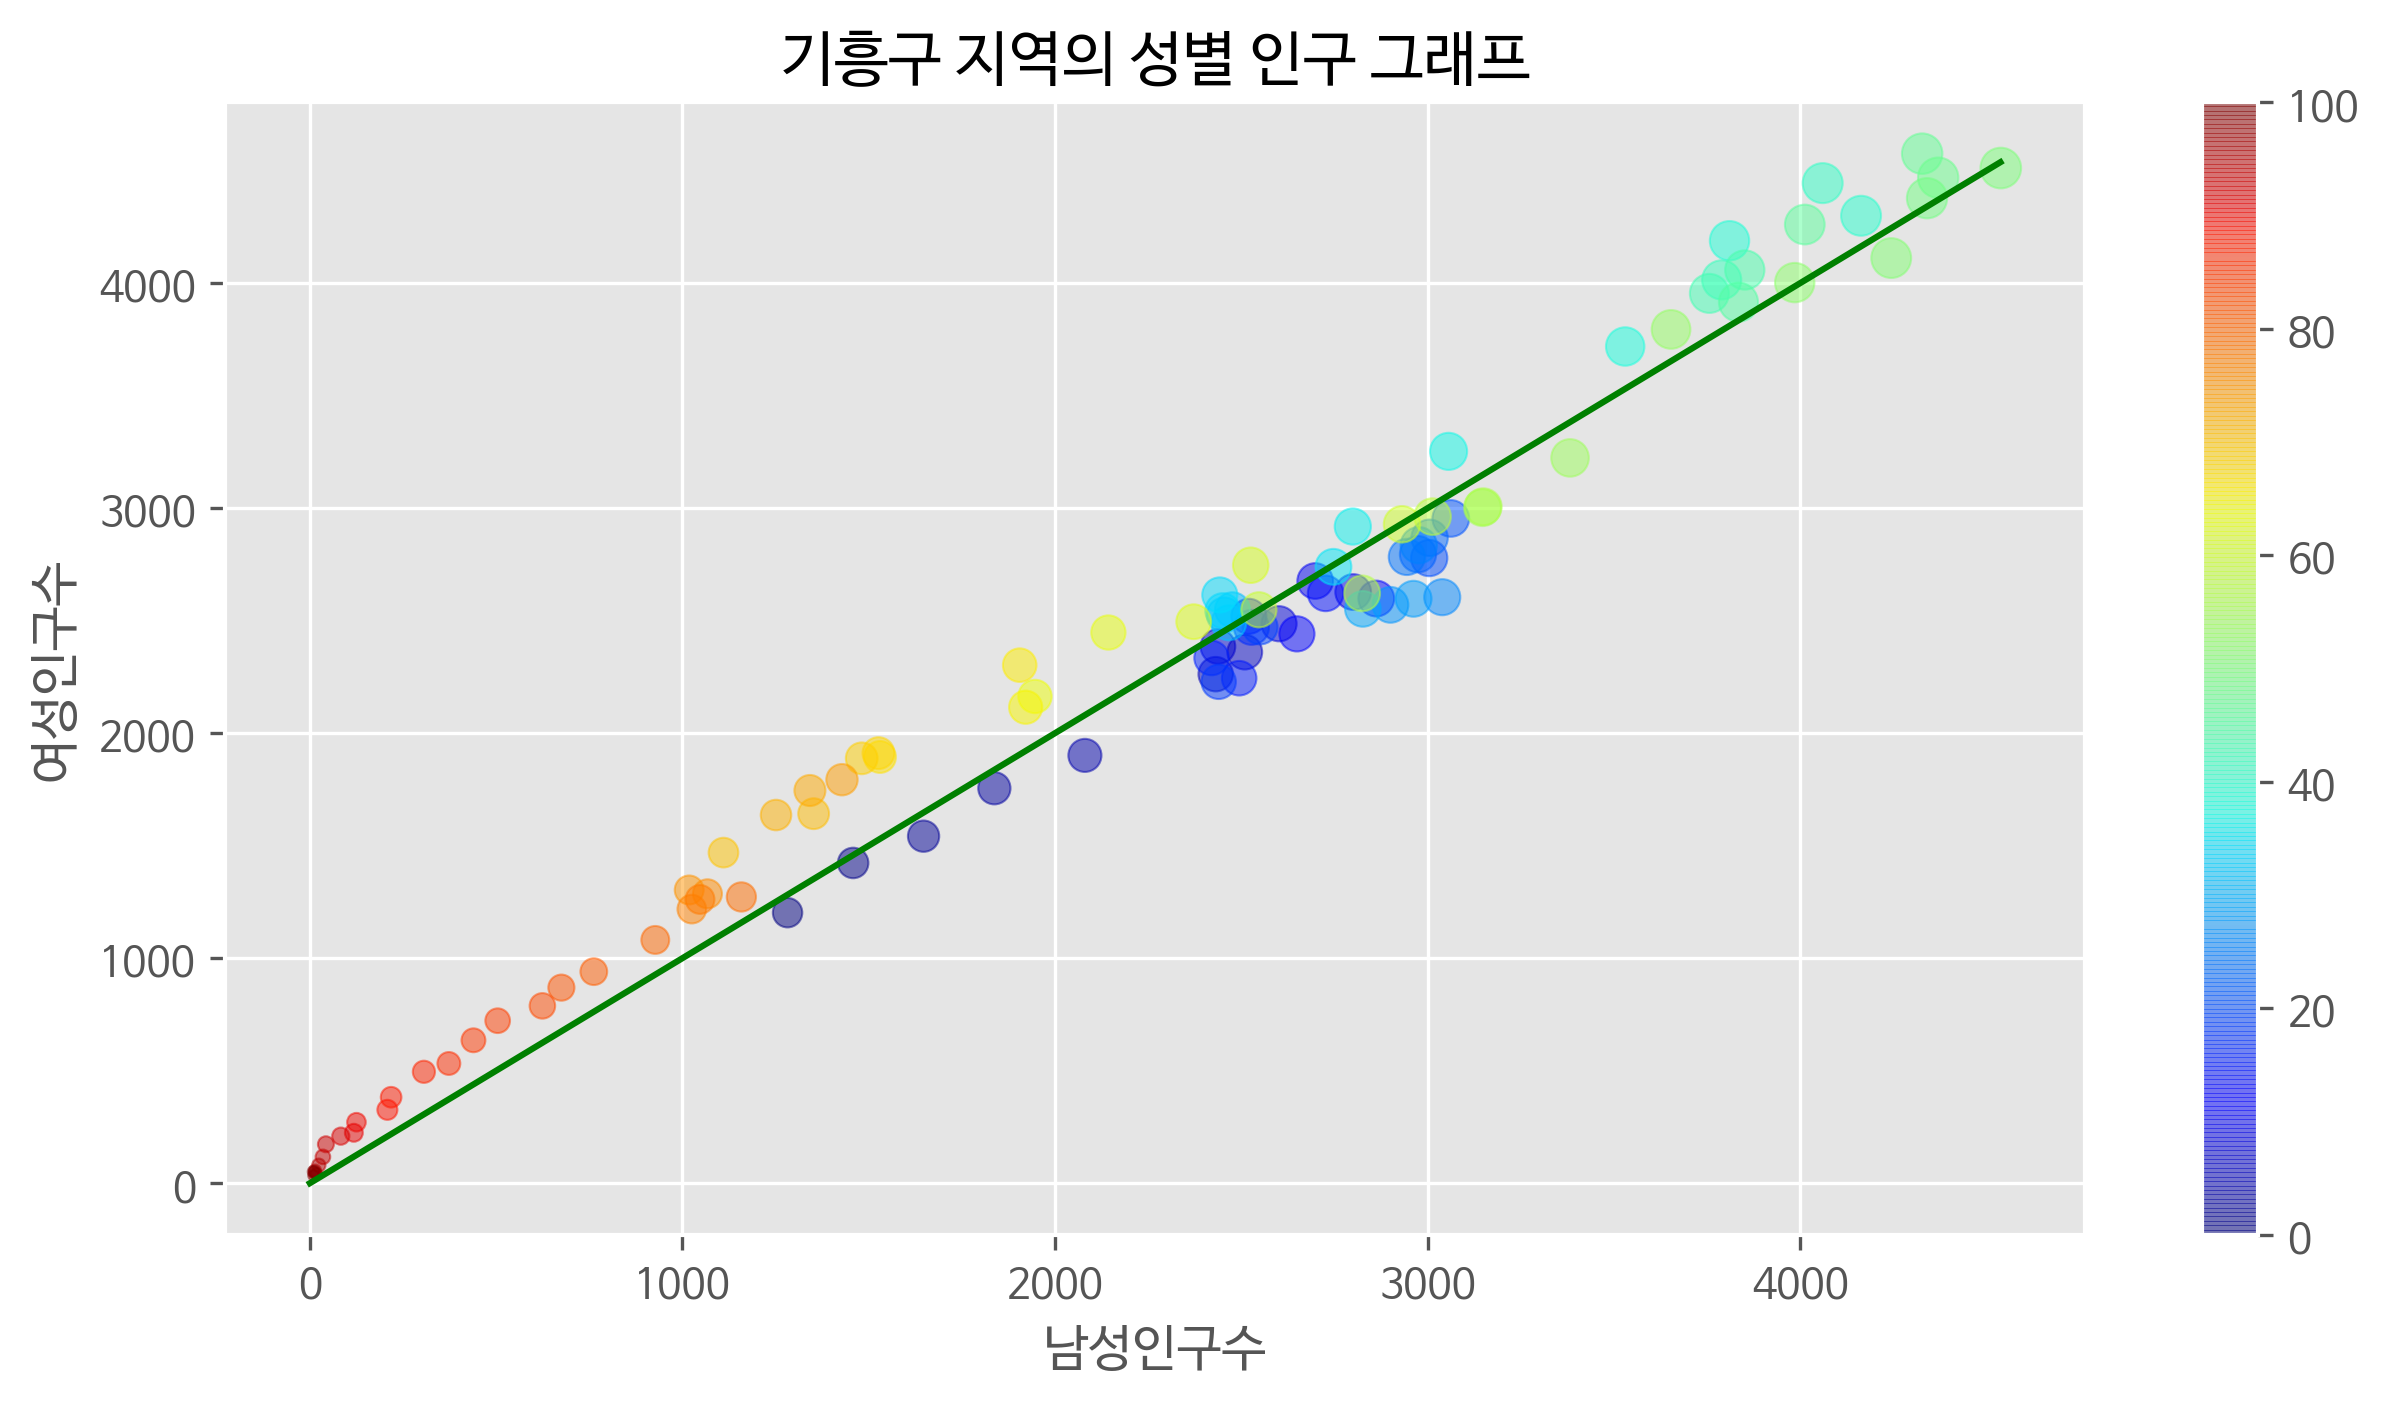

In [ ]:
import csv
import math
f = open('gender-utf8.csv')
data = csv.reader(f)
m = []
f = []
size = []
name = input('읍면동명 입력 : ')
for row in data :
  if name in row[0] :
    for i in range(3, 104) :
      m.append(int(row[i].replace(',','')))
      f.append(int(row[i+103].replace(',','')))
      size.append(math.sqrt(int(row[i].replace(',','')) + int(row[i+103].replace(',',''))))
    break

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(10, 5), dpi=300)
plt.title(name + ' 지역의 성별 인구 그래프')
plt.scatter(m, f, s=size, c=range(101), alpha=.5, cmap='jet')
plt.colorbar()
plt.plot(range(max(m)), range(max(m)), 'g')
plt.xlabel('남성인구수')
plt.ylabel('여성인구수')
plt.show()

# Pandas 인구 데이터 분석

## 데이터 가져오기

In [ ]:
import pandas as pd
pd.__version__
pd.options.display.float_format = '{:,.g}'.format

In [ ]:
# 숫자의 콤마를 모두 제거해야 정수형으로 가져 온다.
df = pd.read_csv('gender.csv', encoding='cp949')
df.dtypes

행정구역                  object
2021년07월_남_총인구수        int64
2021년07월_남_연령구간인구수     int64
2021년07월_남_0세          int64
2021년07월_남_1세          int64
                       ...  
2021년07월_여_96세         int64
2021년07월_여_97세         int64
2021년07월_여_98세         int64
2021년07월_여_99세         int64
2021년07월_여_100세 이상     int64
Length: 207, dtype: object

In [ ]:
# 0~2 : 행정구역, 인구수
# 3~103 : 남자 0세~100세
# 106~206 : 여자 0세~100세 
df.columns[0:4], df.columns[103:105], df.columns[106:207]

(Index(['행정구역', '2021년07월_남_총인구수', '2021년07월_남_연령구간인구수', '2021년07월_남_0세'], dtype='object'),
 Index(['2021년07월_남_100세 이상', '2021년07월_여_총인구수'], dtype='object'),
 Index(['2021년07월_여_0세', '2021년07월_여_1세', '2021년07월_여_2세', '2021년07월_여_3세',
        '2021년07월_여_4세', '2021년07월_여_5세', '2021년07월_여_6세', '2021년07월_여_7세',
        '2021년07월_여_8세', '2021년07월_여_9세',
        ...
        '2021년07월_여_91세', '2021년07월_여_92세', '2021년07월_여_93세', '2021년07월_여_94세',
        '2021년07월_여_95세', '2021년07월_여_96세', '2021년07월_여_97세', '2021년07월_여_98세',
        '2021년07월_여_99세', '2021년07월_여_100세 이상'],
       dtype='object', length=101))

## 데이터 전처리
- 행정구역을 area1 ~ area4 까지 분리하여 열 추가
- 남여 합계를 total로 열 추가

In [ ]:
# 00000은 중복된 상위 행정 구역, 제거함
df = df[~df['행정구역'].str.contains('00000')]
# 행정구역 (시도 구군 읍면 동) 을 ' '로 분리
area = list(df['행정구역'].str.split(' '))

In [ ]:
df1 = df.copy()
len(df1)

3555

In [ ]:
# 지역을 구분하는 4개의 열을 빈 문자열로 추가
df1['area1'] = ''
df1['area2'] = ''
df1['area3'] = ''
df1['area4'] = ''

In [ ]:
# '행정구역'을 빈 문자열로 분리 후 각각의 열에 저장
for i in range(len(df1)) :
  area = df1.iloc[i, 0].split(' ')
  df1.iloc[i, len(df1.columns)-4] = area[0]
  df1.iloc[i, len(df1.columns)-3] = area[1]
  df1.iloc[i, len(df1.columns)-2] = area[2].split('(')[0]
  if len(area) == 4 :  # 예 : 경기도 용인시 기흥구 중동
    df1.iloc[i, len(df1.columns)-1] = area[3].split('(')[0]

In [ ]:
# 용인시 기흥구를 출력해 본다.
df1[df1['area3'] == '기흥구']

In [ ]:
# 남여 합계를 total 열에 저장
df1['total'] = df1['2021년07월_남_총인구수'] + df1['2021년07월_여_총인구수']

In [ ]:
#@title 광역 지역 선택 { run: "auto", form-width: "200px" }
area01 = "\uACBD\uAE30\uB3C4" #@param ["\uC11C\uC6B8", "\uACBD\uAE30\uB3C4", "\uBD80\uC0B0", "\uC778\uCC9C", "\uC6B8\uC0B0", "\uB300\uC804", "\uB300\uAD6C", "\uAD11\uC8FC", "\uAC15\uC6D0", "\uC81C\uC8FC"]
# 광역시도, 시구를 선택하여 인구 합계 출력, 경기도는 남녀 합계 13,512,867명
'{} 합계 : {:,} 명'.format(area01, df1[df1['area1'].str.contains(area01)]['total'].sum())

'경기도 합계 : 13,512,867 명'

## 지역을 차례대로 선택하여 그래프 그리기
- area1, area2를 선택

In [ ]:
# 한글 출력 세팅
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic', size=14) 

In [ ]:
# Ctrl + F10으로 이후 셀 함께 실행
area1 = list(df1['area1'].unique())
count = 1
for i in range(len(area1)) :
  print(f'{i} : {area1[i]}', end='\t')
  if count % 6 == 0 : print('')
  count += 1
count = 1 
no1 = int(input('지역 번호 : '))
area2 = list(df1[df1['area1'] == area1[no1]]['area2'].unique())
for i in range(len(area2)) :
  print(f'{i} : {area2[i]}', end='\t')
  if count % 6 == 0 : print('')
  count += 1
no2 = int(input('지역 번호 : '))
area3 = df1[df1['area1'] == area1[no1]][df1['area2'] == area2[no2]][['행정구역','2021년07월_남_총인구수', '2021년07월_여_총인구수', 'total']].copy()
area3 = area3.sort_values(by='total', ascending=False)

print('{} {} : {:,}명'.format(area1[no1], area2[no2], area3['total'].sum()))

0 : 서울특별시	1 : 부산광역시	2 : 대구광역시	3 : 인천광역시	4 : 광주광역시	5 : 대전광역시	
6 : 울산광역시	7 : 세종특별자치시	8 : 경기도	9 : 강원도	10 : 충청북도	11 : 충청남도	
12 : 전라북도	13 : 전라남도	14 : 경상북도	15 : 경상남도	16 : 제주특별자치도	지역 번호 : 8
0 : 수원시	1 : 성남시	2 : 의정부시	3 : 안양시	4 : 부천시	5 : 광명시	
6 : 평택시	7 : 동두천시	8 : 안산시	9 : 고양시	10 : 과천시	11 : 구리시	
12 : 남양주시	13 : 오산시	14 : 시흥시	15 : 군포시	16 : 의왕시	17 : 하남시	
18 : 용인시	19 : 파주시	20 : 이천시	21 : 안성시	22 : 김포시	23 : 화성시	
24 : 광주시	25 : 양주시	26 : 포천시	27 : 여주시	28 : 연천군	29 : 가평군	
30 : 양평군	지역 번호 : 18
경기도 용인시 : 1,079,049명


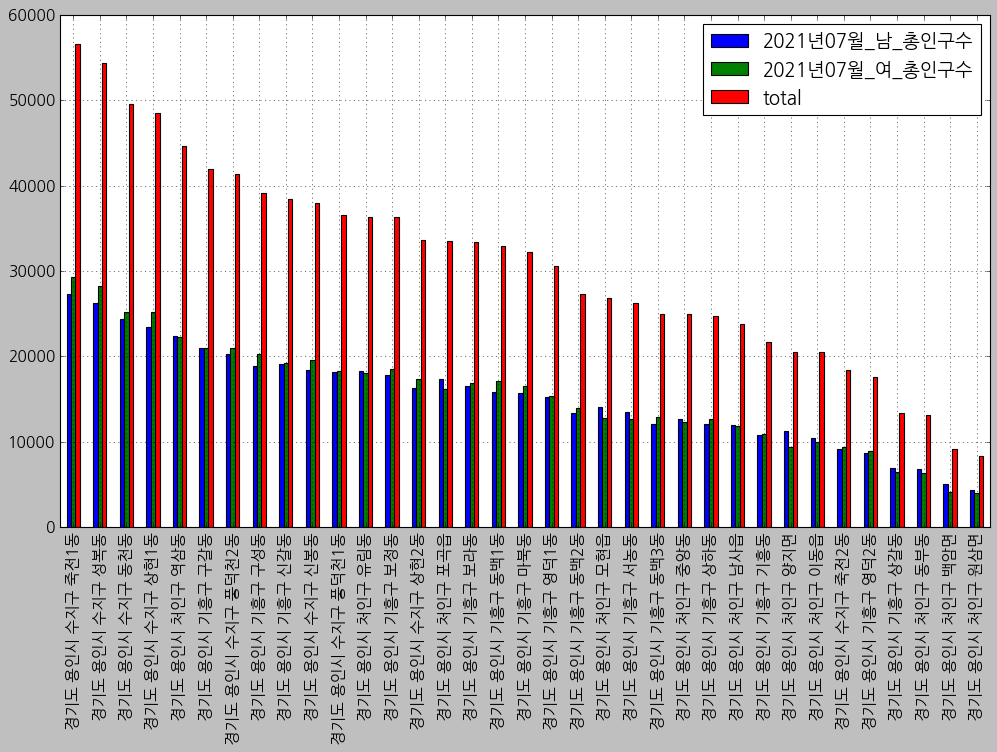

In [ ]:
# 경고메시지 없애기
import warnings
warnings.filterwarnings(action='ignore') 

plt.style.use('classic')
plt.rc('font', family='NanumGothic', size=14) 
area3.index = list(map(lambda x:x.split('(')[0], area3['행정구역']))
area3.plot.bar(rot=90, figsize=(15,8), grid=True)
plt.show()

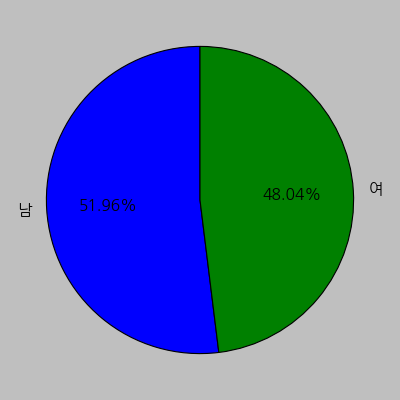

In [ ]:
male, female = area3['2021년07월_남_총인구수'].sum(), area3['2021년07월_여_총인구수'].sum()
plt.pie([male, female], labels=['남','여'], startangle=90, autopct='%.2f%%')
plt.show()

## 지역 / 나이 / 성별 합계 구하기

In [ ]:
agemin = -1
agemax = float('inf')
# 입력값 검사
while not(agemin >= 0 and agemin <= 100) :
  try :
    agemin = int(input('최소나이 : ')) # 0 이상
    if not (agemin >=0 and agemin <= 100) : raise
  except :
    print('0 이상 100 이하로 입력하세요.')

while agemax < agemin or agemax > 100 :
  try :
    agemax = int(input('최대나이 : ')) # 0 이상
    if agemax <= agemin or agemax > 100 : raise
  except :
    print(f'{agemin} 이상 100 이하로 입력하세요.')

print(f'최저 : {agemin} 최대 : {agemax}')

최소나이 : 11
최대나이 : -1
11 이상 100 이하로 입력하세요.
최대나이 : 10
11 이상 100 이하로 입력하세요.
최대나이 : 101
11 이상 100 이하로 입력하세요.
최대나이 : 20
최저 : 11 최대 : 20


In [ ]:
# 남자 합계, 3~103열, 여자 합계 : 106:206 원하는 나이 구간으로 자르면 됨.
# 지역도 입력받아야 함.
temp = df1[df1['행정구역'].str.contains('용인시')].iloc[:, :207].copy()
temp['남합계'] = temp.iloc[:, agemin+3:agemax+4].sum(axis=1).astype(float)
temp['여합계'] = temp.iloc[:, agemin + 106:agemax + 107].sum(axis=1).astype(float)
temp['합계'] = temp['남합계'] + temp['여합계']
temp = temp.sort_values(by='합계', ascending=False)
# 정수를 세자리마다 콤마를 붙이려면 float로 변환한 후 아래 줄을 사용한다.
pd.options.display.float_format = '{:,g}'.format
temp = temp[['행정구역','남합계','여합계','합계']].copy()
temp['합계'] = temp['합계'].astype(float)
temp.index = map(lambda x: x.split('(')[0], temp['행정구역'])
del temp['행정구역']
temp

,남합계,여합계,합계
경기도 용인시 수지구 죽전1동,"3,522","3,525","7,047"
경기도 용인시 수지구 성복동,"3,181","3,297","6,478"
경기도 용인시 수지구 상현1동,"3,112","3,070","6,182"
경기도 용인시 기흥구 동백1동,"2,842","2,762","5,604"
경기도 용인시 수지구 풍덕천2동,"2,858","2,739","5,597"
경기도 용인시 수지구 동천동,"2,733","2,561","5,294"
경기도 용인시 수지구 신봉동,"2,695","2,549","5,244"
경기도 용인시 기흥구 구성동,"2,498","2,293","4,791"
경기도 용인시 기흥구 동백2동,"2,406","2,243","4,649"
경기도 용인시 처인구 역삼동,"2,306","2,265","4,571"


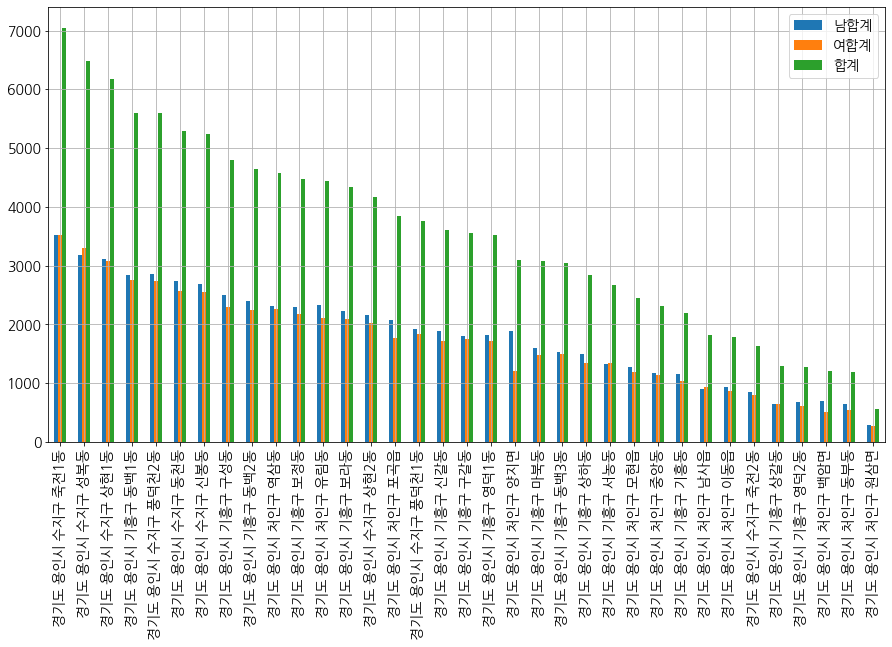

In [ ]:
temp.plot(kind='bar', figsize=(15,8), grid=True)